# week 7
## RECURRENT NEURAL NETWORKS (RNNs)
### Implement a simple RNN for a time-series prediction task (e.g., predicting sine wave).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [2]:
# Generate synthetic sine wave data
def generate_sine_wave(seq_length, num_samples):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi  # Random start point
        seq = np.array([np.sin(start + i) for i in range(seq_length + 1)])
        X.append(seq[:-1])
        y.append(seq[-1])
    return np.array(X), np.array(y)

In [3]:
# Define sequence length and dataset size
seq_length = 50
num_samples = 1000
X, y = generate_sine_wave(seq_length, num_samples)

In [4]:
# Reshape for RNN input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

test_size = int(0.2 * num_samples)
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

In [5]:
# Build RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

In [6]:
# Compile model
model.compile(optimizer='adam', loss='mse')

In [7]:
# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/20
50/50 [==============================] - 0s 3ms/step - loss: 0.1215 - val_loss: 3.0205e-04
Epoch 2/20
50/50 [==============================] - 0s 2ms/step - loss: 1.3118e-04 - val_loss: 2.1017e-05
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 1.2804e-05 - val_loss: 9.6599e-06
Epoch 4/20
50/50 [==============================] - 0s 2ms/step - loss: 7.9173e-06 - val_loss: 9.2108e-06
Epoch 5/20
50/50 [==============================] - 0s 2ms/step - loss: 7.7341e-06 - val_loss: 7.5192e-06
Epoch 6/20
50/50 [==============================] - 0s 2ms/step - loss: 6.4688e-06 - val_loss: 6.5096e-06
Epoch 7/20
50/50 [==============================] - 0s 2ms/step - loss: 5.8179e-06 - val_loss: 6.0391e-06
Epoch 8/20
50/50 [==============================] - 0s 2ms/step - loss: 6.0148e-06 - val_loss: 5.3755e-06
Epoch 9/20
50/50 [==============================] - 0s 2ms/step - loss: 4.4289e-06 - val_loss: 4.2441e-06
Epoch 10/20
50/50 [==============================]

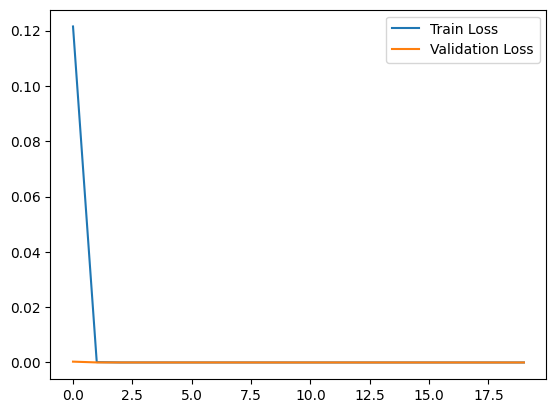

In [8]:
# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

7/7 [==============================] - 0s 1ms/step


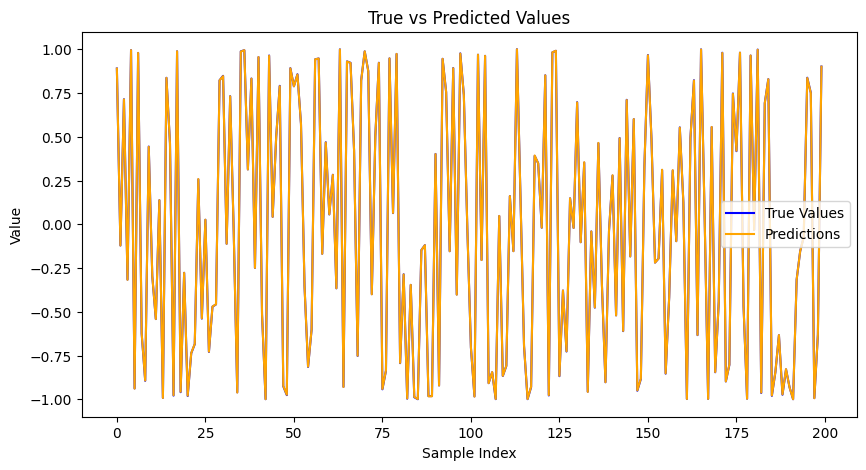

In [9]:
# Evaluate model
predictions = model.predict(X_test)
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='True Values', color='blue')
plt.plot(predictions, label='Predictions', color='orange')
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("True vs Predicted Values")
plt.show()